In [1]:
import os
import pathlib

if pathlib.Path(os.curdir).resolve().name != "DeepAWB":
    os.chdir("..")

%load_ext autoreload
%autoreload 2

In [2]:
from src.bayesian_awb.bayesian_awb_algorithm import perform_bayes_AWB

2024-09-21 13:40:20.360 | WARNING  | src.deep_awb.data_loaders:setup:101 - Called `setup` with image_scale=1 when it was already set to self._image_scale=1


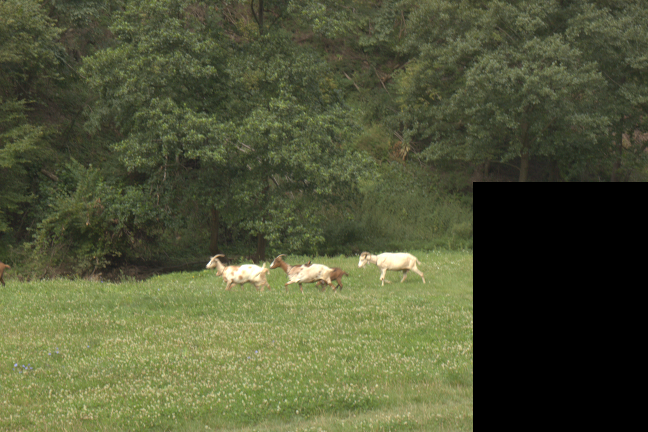

In [3]:
import PIL

from src import DATASET_DIR
from src.deep_awb.data_loaders import SimpleCubePPDatasetInfo, get_test_dataset
from src.visualization.image_visualization import image_processing_pipeline

SimpleCubePPDatasetInfo.setup()
dataset = get_test_dataset()

i = 48
image_name = dataset.annotations["image"][i]

raw_image_path = DATASET_DIR / "test" / "PNG" / (f"{image_name}.png")
image = image_processing_pipeline(raw_image_path, None, dataset.annotations.iloc[i][["R/G", "B/G"]].values)
PIL.Image.fromarray(image)

In [6]:
%%time
perform_bayes_AWB(raw_image_path)

CPU times: user 149 ms, sys: 18.8 ms, total: 167 ms
Wall time: 58.9 ms


(0.5439898774358961, 0.4713478444825284)

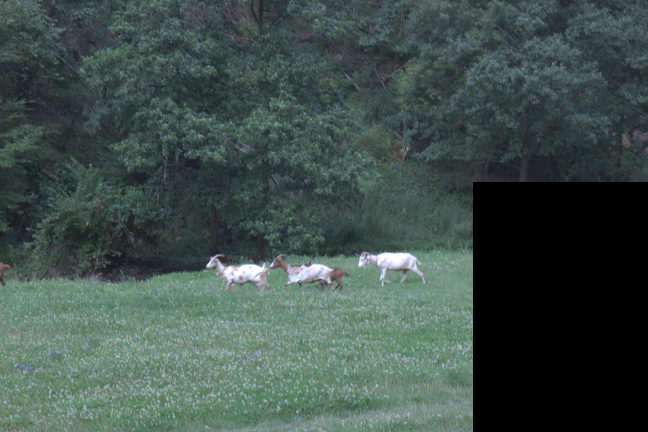

In [5]:
best_gain = perform_bayes_AWB(raw_image_path, visualize=True)
PIL.Image.fromarray(image_processing_pipeline(raw_image_path, None, best_gain))